In [6]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

In [7]:
backend = FakeManilaV2()
sampler = Sampler(mode=backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

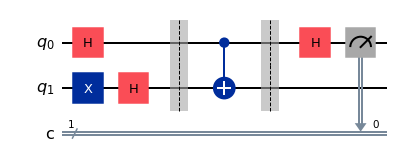

In [8]:
qc = QuantumCircuit(2, 1)

qc.h(0)
qc.x(1)
qc.h(1)

qc.barrier()

qc.cx(0, 1)

qc.barrier()

qc.h(0)
qc.measure(0, 0)

qc.draw(output="mpl")


In [4]:
#isa_circuit = pm.run(qc)
#job = sampler.run([isa_circuit], shots=1024)
#result = job.result()
#pub_result = result[0]

service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

sampler = Sampler(mode=backend)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

job = sampler.run([isa_circuit], shots=1024)
result = job.result()
pub_result = result[0]


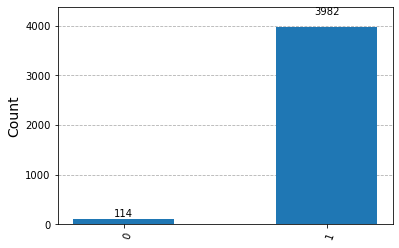

In [5]:
plot_histogram(pub_result.data.c.get_counts())